In [3]:
## The _make_moons_ dataset...
# " Make two interleaving half circles
# A simple toy dataset to visualize clustering and classification algorithms. "

import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Get the Dataset
samples, targets = make_moons(n_samples=10_000, noise=0.4)

# Split train and test sets
tts = train_test_split(samples, targets)
samples_train, samples_test, targets_train, targets_test = tts

# Grid search for best hyperparameters
# We'll look at the combination of max_leaf_nodes (hinted)
# and max_depth. Verbose to see the runstats.
grid_search = GridSearchCV(DecisionTreeClassifier(), {
    'max_leaf_nodes': list(range(2,  100, 2)),
    'max_depth':      list(range(10, 100, 5)),
}, verbose=1)

# Do the grid searching.
# Warning : This took 18.1s for me!
grid_search.fit(samples_train, targets_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 882 candidates, totalling 2646 fits


[Parallel(n_jobs=1)]: Done 2646 out of 2646 | elapsed:   18.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                       60, 65, 70, 7

In [6]:
# Best model is an attribute of the search
model = grid_search.best_estimator_

# Looks like our best solution was max_depth=10 and max_leaf_nodes=12.
# This is not too close to our restrictions! 
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
# Let's check our results...
from sklearn.metrics import accuracy_score

predictions_test = model.predict(samples_test)
accuracy_score(predictions_test, targets_test)

# Success! I got 0.85 here but as the training algorithm is stochastic,
# results may vary.

0.85

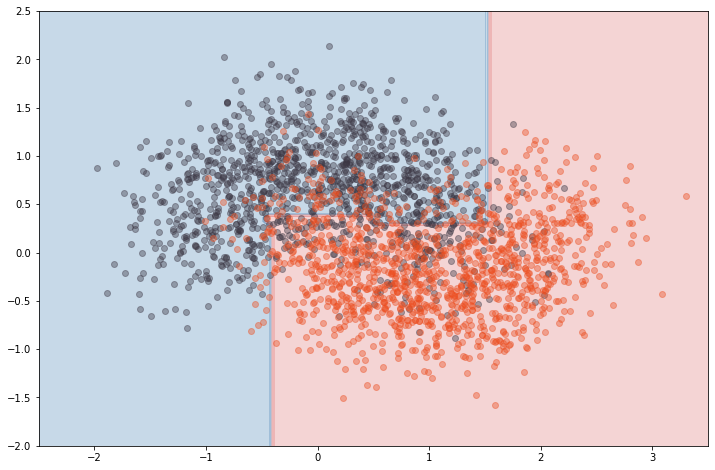

In [30]:
# Let's visualise!
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

axis_one = np.linspace(-2.5, 3.5, 100) #start, stop, array-size
axis_two = np.linspace(-2, 2.5, 100)
axis_one, axis_two = np.meshgrid(axis_one, axis_two) #union

all_combinations = np.c_[axis_one.ravel(), axis_two.ravel()] #works like zip
all_predictions  = model.predict(all_combinations).reshape(axis_one.shape)

color_map = ListedColormap(['#4682b4', '#dd7373'])

plt.figure(figsize=(12, 8))

plt.contourf(axis_one, axis_two, all_predictions, alpha=0.3, cmap=color_map)

plt.scatter(
    samples_test[:,0][targets_test==0],
    samples_test[:,1][targets_test==0],
    marker='o',
    color='#3c3744',
    alpha=0.4
)
plt.scatter(
    samples_test[:,0][targets_test==1],
    samples_test[:,1][targets_test==1],
    marker='o',
    color='#ec4e20',
    alpha=0.4
)
plt.show()